# 贴现记录表分数

In [25]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()

In [26]:
G.add_edges_from([('A', 'B'),('C','D'),('G','D')], weight=1)
G.add_edges_from([('B','A'),('D','E'),('B','D'),('D','E')], weight=2)
G.add_edges_from([('B','C'),('E','F')], weight=3)
G.add_edges_from([('C','F')], weight=4)

# 利润得分 

{('A', 'B'): 1}
{('A', 'B'): 1, ('B', 'A'): 2}
{('A', 'B'): 1, ('B', 'A'): 2, ('B', 'D'): 2}
{('A', 'B'): 1, ('B', 'A'): 2, ('B', 'D'): 2, ('B', 'C'): 3}
{('A', 'B'): 1, ('B', 'A'): 2, ('B', 'D'): 2, ('B', 'C'): 3, ('C', 'D'): 1}
{('A', 'B'): 1, ('B', 'A'): 2, ('B', 'D'): 2, ('B', 'C'): 3, ('C', 'D'): 1, ('C', 'F'): 4}
{('A', 'B'): 1, ('B', 'A'): 2, ('B', 'D'): 2, ('B', 'C'): 3, ('C', 'D'): 1, ('C', 'F'): 4, ('D', 'E'): 2}
{('A', 'B'): 1, ('B', 'A'): 2, ('B', 'D'): 2, ('B', 'C'): 3, ('C', 'D'): 1, ('C', 'F'): 4, ('D', 'E'): 2, ('G', 'D'): 1}
{('A', 'B'): 1, ('B', 'A'): 2, ('B', 'D'): 2, ('B', 'C'): 3, ('C', 'D'): 1, ('C', 'F'): 4, ('D', 'E'): 2, ('G', 'D'): 1, ('E', 'F'): 3}


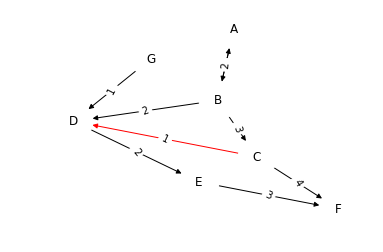

In [27]:
#val_map = {'A': 1.0,
#                   'D': 0.5714285714285714,
#                              'H': 0.0}

#values = [val_map.get(node, 0.45) for node in G.nodes()]


edge_labels={}
for u,v,d in G.edges(data='weight'):
    edge_labels[(u,v)] = d

    
    print(edge_labels)


red_edges = [('C','D'),('D','A')]
edge_colors = ['black' if not edge in red_edges else 'red' for edge in G.edges()]
pos=nx.spring_layout(G) #首先画出节点位置
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
nx.draw(G,pos,  node_color='white',node_size=1500,edge_color=edge_colors,edge_cmap=plt.cm.Reds, with_labels=True) # node_color = values,
plt.show() # display

# 汇总 

[(1, 2, {'weight': 10})]
[(1, 2, None), (1, 3, 233), (4, 5, 233)]
[(1, 2, {'weight': 100000}), (1, 3, {'len': 233}), (4, 5, {'len': 233})]


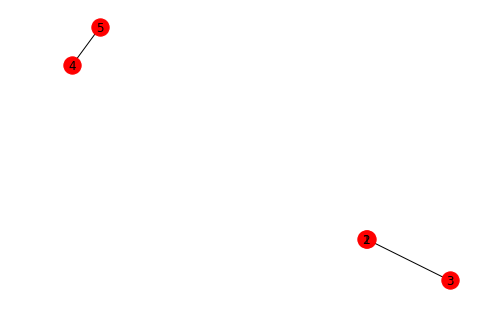

In [22]:
G = nx.Graph(day='manday')
G.add_edge(1,2,weight=10)                    #在添加边时分配属性
print(G.edges(data=True))

G.add_edges_from([(1,3), (4,5)], len=233)     #从集合中添加边时分配属性
print(G.edges(data='len'))

#G.add_edges_from([(3,4,{'hight':10}),(1,4,{'high':'unknow'})])
#print(G.edges(data=True))

G[1][2]['weight'] = 100000                   #通过G[][][]来添加或修改属性
print(G.edges(data=True))
nx.draw(G, with_labels=True)
plt.show()

# 省行转贴现的利润表分析

生成一个空的有向图
为这个网络添加节点...
在网络中添加带权中的边...
给网路设置布局...
画出网络图像：


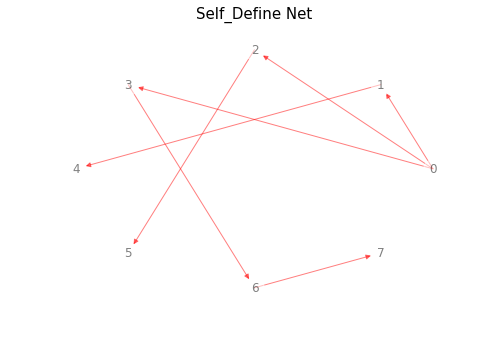

dijkstra方法寻找最短路径：
节点0到7的路径： [0, 3, 6, 7]
dijkstra方法寻找最短距离：
节点0到7的距离为： 9


In [81]:
import networkx as nx
import pylab 
import numpy as np
#自定义网络
row=np.array([0,0,0,1,2,3,6])
col=np.array([1,2,3,4,5,6,7])
value=np.array([1,2,1,8,1,3,5])

print('生成一个空的有向图')
G=nx.DiGraph()
print('为这个网络添加节点...')
for i in range(0,np.size(col)+1):
    G.add_node(i)
print('在网络中添加带权中的边...')
for i in range(np.size(row)):
    G.add_weighted_edges_from([(row[i],col[i],value[i])])

print('给网路设置布局...')
pos=nx.shell_layout(G)
print('画出网络图像：')
nx.draw(G,pos,with_labels=True, node_color='white', edge_color='red', node_size=400, alpha=0.5 )
pylab.title('Self_Define Net',fontsize=15)
pylab.show()


'''
Shortest Path with dijkstra_path
'''
print('dijkstra方法寻找最短路径：')
path=nx.dijkstra_path(G, source=0, target=7)
print('节点0到7的路径：', path)
print('dijkstra方法寻找最短距离：')
distance=nx.dijkstra_path_length(G, source=0, target=7)
print('节点0到7的距离为：', distance) 
